# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
df = load_dataset(name='tips')
df['tip_pct'] = df['tip']/(df['total_bill'] - df['tip'])
df['net_bill'] = df['total_bill'] - df['tip']
df

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07


In [3]:
y, X = patsy.dmatrices(formula_like='tip ~ sex + smoker + time + net_bill', data=df)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [4]:
y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [5]:
y, X = patsy.dmatrices(formula_like='tip ~ net_bill', data=df)

mdl_sm1 = sm.OLS(y,X).fit()
mdl_sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           5.02e-23
Time:                        18:37:38   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

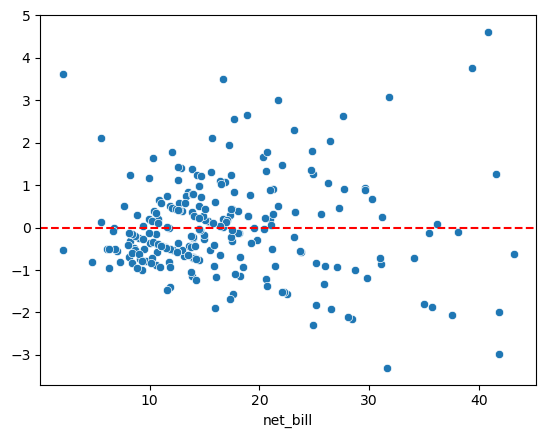

In [6]:
sns.scatterplot(x='net_bill', y=mdl_sm1.resid, data=df)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

In [7]:
y, X = patsy.dmatrices(formula_like='tip ~ np.log(net_bill)', 
                       data=df)

mdl_sm1_log = sm.OLS(y, X).fit()
mdl_sm1_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           4.40e-20
Time:                        18:37:38   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
y, X = patsy.dmatrices(formula_like='tip ~ net_bill + np.power(net_bill, 2)', 
                       data=df)

mdl_sm1_pow = sm.OLS(y, X).fit()
mdl_sm1_pow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           4.96e-22
Time:                        18:37:38   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
print('`modelo_sm1_log` R-squared:', mdl_sm1_log.rsquared)
print()
print('`modelo_sm1_pow` R-squared:', mdl_sm1_pow.rsquared)

`modelo_sm1_log` R-squared: 0.2944412513792952

`modelo_sm1_pow` R-squared: 0.3344216007656948


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ sex + smoker + time + net_bill', 
                       data=df)

mdl_sm2 = sm.OLS(y, X).fit()
mdl_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.21e-18
Time:                        18:37:38   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ net_bill', 
                       data=df)

mdl_sm2 = sm.OLS(y, X).fit()
mdl_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           2.60e-21
Time:                        18:37:38   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

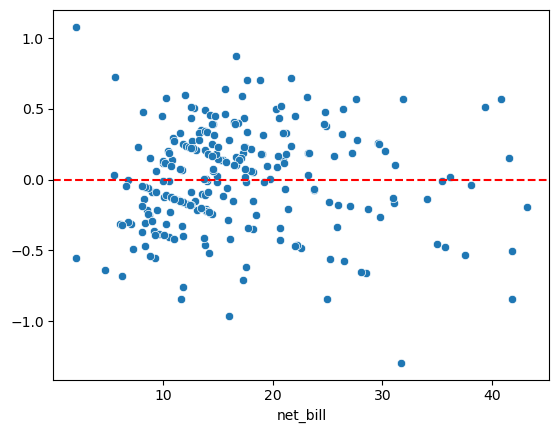

In [12]:
sns.scatterplot(x='net_bill', 
                y=mdl_sm2.resid, 
                data=df)
plt.axhline(y=0, 
            color='r', 
            linestyle='--')

plt.show()

In [13]:
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ np.log(net_bill)', 
                       data=df)

mdl_sm2_log = sm.OLS(y, X).fit()
mdl_sm2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           5.62e-22
Time:                        18:37:38   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ net_bill + np.power(net_bill,2)', 
                       data=df)

mdl_sm2_pow = sm.OLS(y, X).fit()
mdl_sm2_pow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           2.82e-22
Time:                        18:37:38   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill                  0.0655      0.012      5.642      0.000       0.043       0.088
np.power(net_bill, 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
print('`modelo_sm2_log` R-squared:', mdl_sm2_log.rsquared)
print()
print('`modelo_sm2_pow` R-squared:', mdl_sm2_pow.rsquared)

`modelo_sm2_log` R-squared: 0.3191910159472313

`modelo_sm2_pow` R-squared: 0.337524395160816


In [16]:
df['pred_tip_log'] = np.exp(mdl_sm2_log.fittedvalues)

print('`mdl_sm2_log` R-squared:',
      df[['pred_tip_log', 'tip']].corr().iloc[0,1]**2)

print()

df['pred_tip_pow'] = np.exp(mdl_sm2_pow.fittedvalues)
print('`mdl_sm2_pow` R-squared:',
      df[['pred_tip_pow', 'tip']].corr().iloc[0,1]**2)

`mdl_sm2_log` R-squared: 0.3283774385527559

`mdl_sm2_pow` R-squared: 0.32908491114682054


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [18]:
arquivo = './input/previsao renda.csv'

df_renda = pd.read_csv(arquivo)
df_renda.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [19]:
reg = smf.ols(formula='renda ~ tempo_emprego', data=df_renda).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Thu, 12 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:38:31   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
df_renda['renda_predict'] = reg.predict(df_renda)
print('R-squared', df_renda[['renda_predict', 'renda']].corr().iloc[0,1]**2)

R-squared 0.1554213960704438


<function matplotlib.pyplot.show(close=None, block=None)>

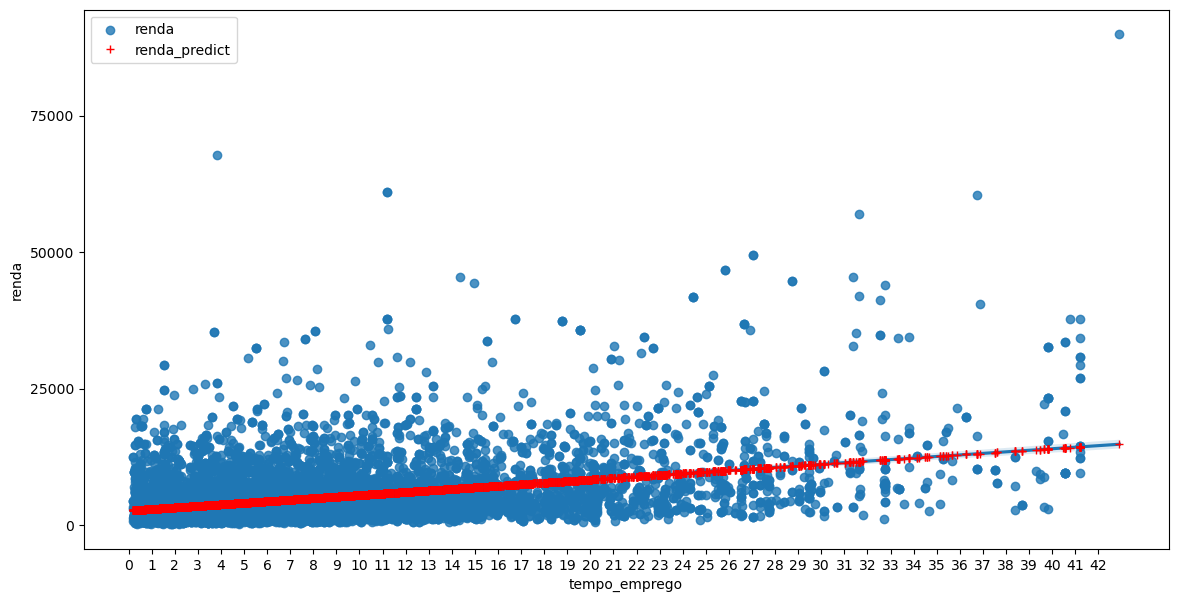

In [21]:
plt.figure(figsize=(14,7))

sns.regplot(x='tempo_emprego', y='renda', data=df_renda, label='renda')
plt.plot(df_renda['tempo_emprego'], df_renda['renda_predict'], 'r+', label='renda_predict')

plt.legend()

plt.xticks(ticks=np.arange(stop=df_renda['tempo_emprego'].max(), step=1))
plt.yticks(ticks=np.arange(stop=df_renda['renda'].max(), step=25000))

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

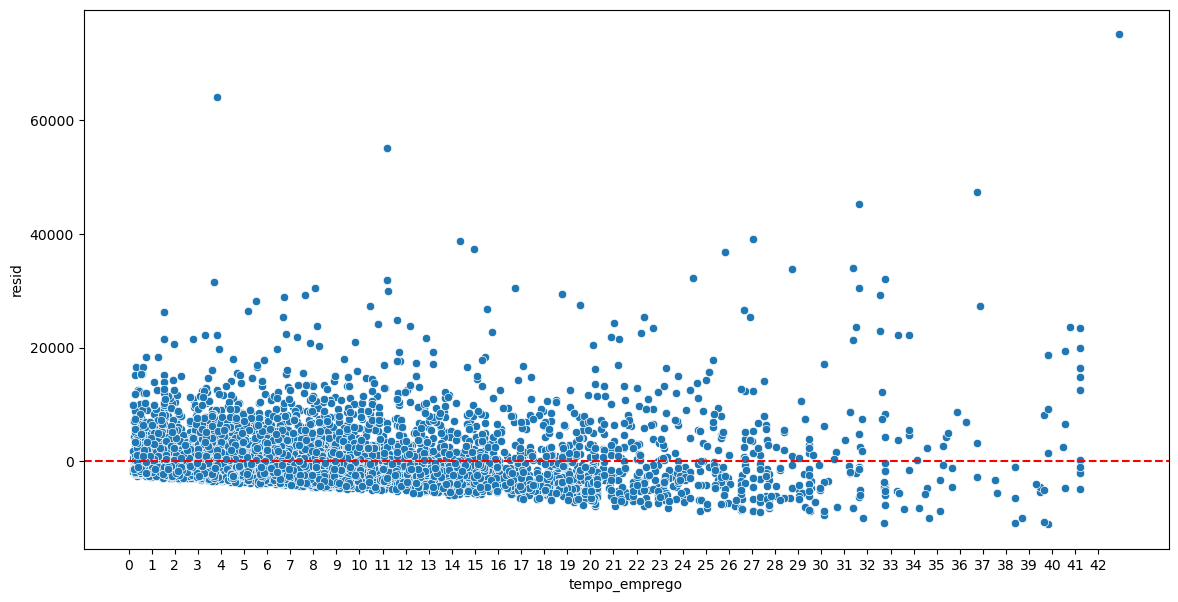

In [22]:
plt.figure(figsize=(14,7))

df_renda['resid'] = reg.resid
sns.scatterplot(x='tempo_emprego', y='resid', data=df_renda)

plt.axhline(y=0, color='r', linestyle='--')

plt.xticks(ticks=np.arange(stop=df_renda['tempo_emprego'].max(), step=1))

plt.show

In [23]:
reg = smf.ols(formula='np.log(renda) ~ np.log(tempo_emprego)', 
              data=df_renda
             ).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1394.
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          2.85e-289
Time:                        18:38:34   Log-Likelihood:                -14269.
No. Observations:               12466   AIC:                         2.854e+04
Df Residuals:                   12464   BIC:                         2.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.7492      0.013    603.989      0.000       7.724       7.774
np.log(tempo_emprego)     0.2489      0.007     37.333      0.000       0.236       0.262
==============================================================================
Omnibus:                        9.367   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.357
Skew:                           0.062   Prob(JB):                      0.00929
Kurtosis:                       3.049   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
df_renda['renda_predict'] = np.exp(reg.predict(df_renda))

print('`renda_predict` R-squared:', 
      df_renda[['renda_predict', 'renda']].corr().iloc[0,1]**2
     )

`renda_predict` R-squared: 0.10548785849371341


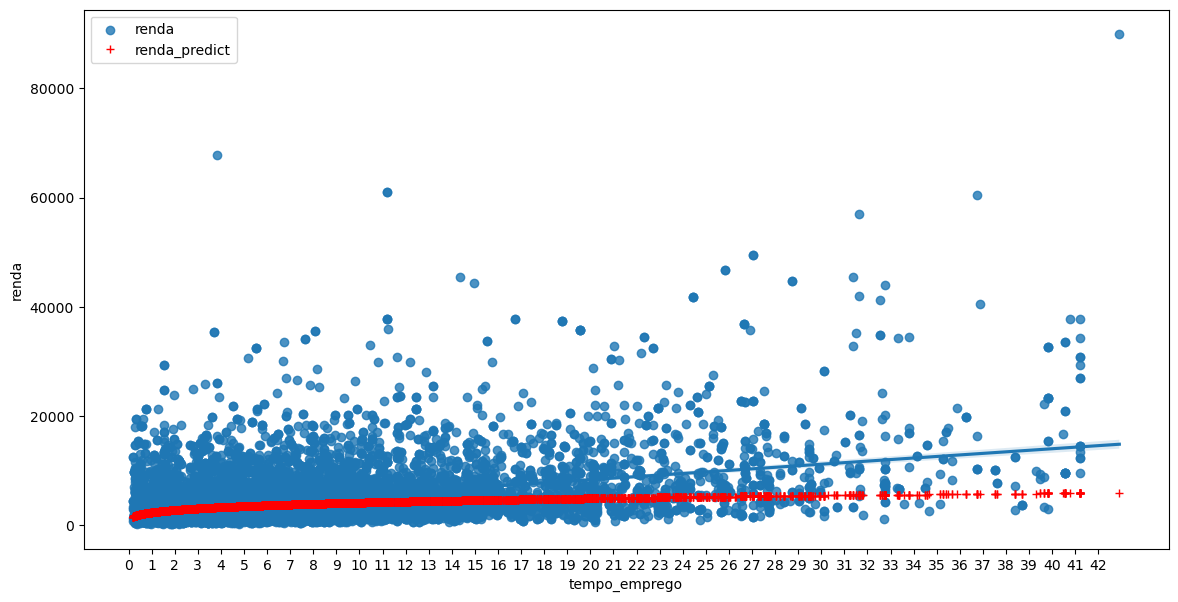

In [25]:
plt.figure(figsize=(14,7))

sns.regplot(x='tempo_emprego', 
            y='renda', 
            data=df_renda, 
            label='renda')

plt.plot(df_renda['tempo_emprego'], 
         df_renda['renda_predict'], 
         'r+', 
         label='renda_predict')

plt.legend()

plt.xticks(ticks=np.arange(stop=df_renda['tempo_emprego'].max(), step=1))

plt.show()

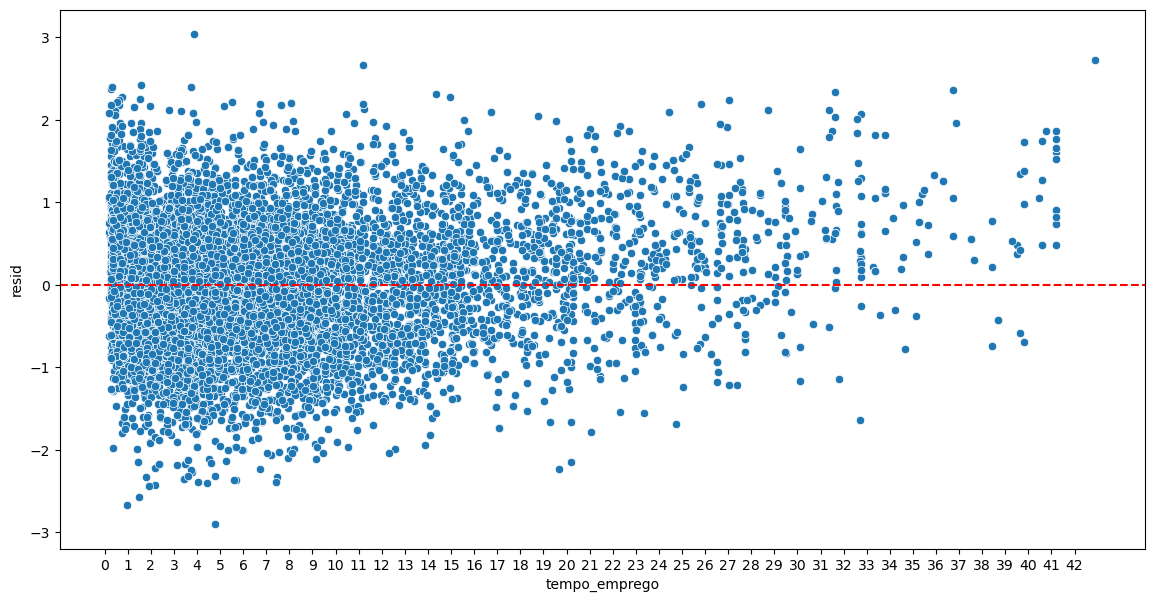

In [26]:
plt.figure(figsize=(14,7))

df_renda['resid'] = reg.resid

sns.scatterplot(x='tempo_emprego', 
                y='resid', 
                data=df_renda)
plt.axhline(y=0, 
            color='r', 
            linestyle='--')

plt.xticks(ticks=np.arange(stop=df_renda['tempo_emprego'].max(), 
                           step=1))

plt.show()

In [27]:
reg_mult = smf.ols(
    formula='''
            renda ~ sexo 
                    + posse_de_veiculo 
                    + posse_de_imovel 
                    + qtd_filhos 
                    + tipo_renda 
                    + educacao 
                    + estado_civil 
                    + tipo_residencia 
                    + idade 
                    + tempo_emprego 
                    + qt_pessoas_residencia
            ''', 
    data=df_renda
).fit()

reg_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     146.9
Date:                Thu, 12 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:38:37   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12441   BIC:                         2.442e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -271.2003   1674.811     -0.162      0.871   -3554.089    3011.688
sexo[T.M]                         2366.1922     88.099     26.858      0.000    2193.505    2538.879
posse_de_veiculo[T.True]           -79.1270     84.709     -0.934      0.350    -245.169      86.915
posse_de_imovel[T.True]            349.0015     83.426      4.183      0.000     185.473     512.530
tipo_renda[T.Bolsista]            -817.4651   2155.323     -0.379      0.704   -5042.231    3407.301
tipo_renda[T.Empresário]          1021.9116     90.142     11.337      0.000     845.219    1198.605
tipo_renda[T.Pensionista]         1725.6132   1437.300      1.201      0.230   -1091.716    4542.943
tipo_renda[T.Servidor público]     436.9668    130.511      3.348      0.001     181.145     692.788
educacao[T.Pós graduação]         2207.5583   1081.061      2.042      0.041      88.511    4326.606
educacao[T.Secundário]            -241.1964    437.786     -0.551      0.582   -1099.324     616.931
educacao[T.Superior completo]      338.2616    439.622      0.769      0.442    -523.465    1199.988
educacao[T.Superior incompleto]   -296.2056    470.976     -0.629      0.529   -1219.392     626.981
estado_civil[T.Separado]           141.9156    806.277      0.176      0.860   -1438.512    1722.343
estado_civil[T.Solteiro]           376.1573    791.461      0.475      0.635   -1175.228    1927.542
estado_civil[T.União]              -41.0497    143.754     -0.286      0.775    -322.829     240.730
estado_civil[T.Viúvo]              -41.1125    827.976     -0.050      0.960   -1664.073    1581.848
tipo_residencia[T.Casa]           -356.2809    328.620     -1.084      0.278   -1000.428     287.866
tipo_residencia[T.Com os pais]    -640.8115    368.489     -1.739      0.082   -1363.106      81.483
tipo_residencia[T.Comunitário]    -577.7117    634.059     -0.911      0.362   -1820.565     665.142
tipo_residencia[T.Estúdio]        -976.1765    547.353     -1.783      0.075   -2049.073      96.720
tipo_residencia[T.Governamental]  -883.1863    397.273     -2.223      0.026   -1661.903    -104.470
qtd_filhos                        -240.3254    789.406     -0.304      0.761   -1787.683    1307.032
idade                               29.8746      4.808      6.213      0.000      20.450      39.299
tempo_emprego                      299.3338      6.140     48.750      0.000     287.298     311.369
qt_pessoas_residencia              306.2508    787.902      0.389      0.698   -1238.159    1850.661
==============================================================================
Omnibus:                    10075.335   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432391.441
Skew:             

In [28]:
reg_mult = smf.ols(
    formula='''
            np.log(renda) ~ sexo 
                            + posse_de_imovel 
                            + idade 
                            + tempo_emprego
            ''', 
    data=df_renda
).fit()

reg_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     907.7
Date:                Thu, 12 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:38:37   Log-Likelihood:                -13335.
No. Observations:               12466   AIC:                         2.668e+04
Df Residuals:                   12461   BIC:                         2.672e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.3732      0.030    243.856      0.000       7.314       7.432
sexo[T.M]                   0.4742      0.013     35.424      0.000       0.448       0.500
posse_de_imovel[T.True]     0.1018      0.013      7.649      0.000       0.076       0.128
idade                       0.0043      0.001      5.958      0.000       0.003       0.006
tempo_emprego               0.0479      0.001     48.283      0.000       0.046       0.050
==============================================================================
Omnibus:                        1.296   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.272
Skew:                           0.011   Prob(JB):                        0.529
Kurtosis:                       3.045   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

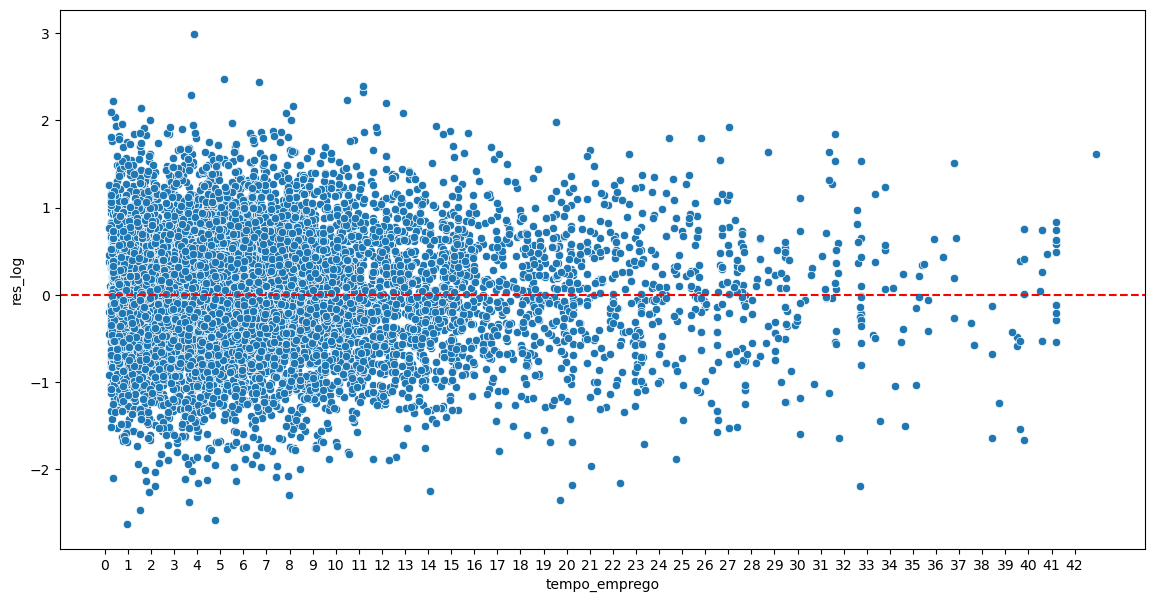

In [29]:
df_renda['res_log'] = reg_mult.resid

plt.figure(figsize=(14,7))
sns.scatterplot(x='tempo_emprego', 
                y='res_log', 
                data=df_renda)
plt.axhline(y=0, 
            color='r', 
            linestyle='--')
plt.xticks(ticks=np.arange(stop=df_renda['tempo_emprego'].max(), 
                           step=1))

plt.show()

In [30]:
df_renda['renda_predict_log'] = np.exp(reg_mult.predict(df_renda))

`renda_predict` R-squared: 10.55 %
`renda_predict_log` R-squared: 22.71 %


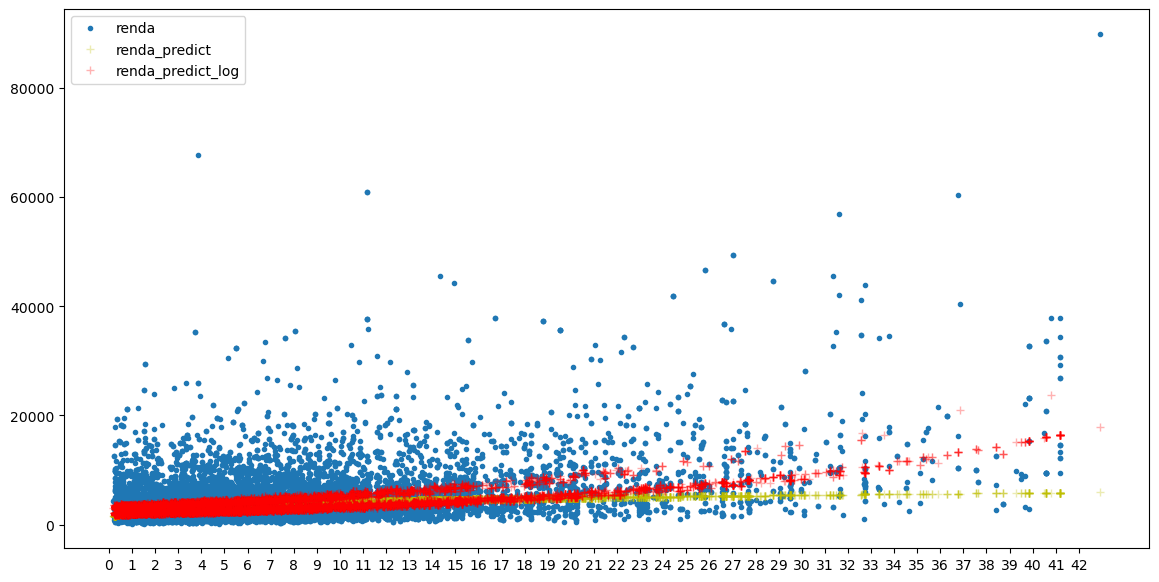

In [31]:
print('`renda_predict` R-squared:', 
      round(df_renda[
          ['renda_predict', 'renda']
      ].corr().iloc[0,1]**2 * 100, 
            2), 
      '%'
     )
print('`renda_predict_log` R-squared:', 
      round(df_renda[
          ['renda_predict_log', 'renda']
      ].corr().iloc[0,1]**2 * 100, 
            2), 
      '%'
     )

plt.figure(figsize=(14,7))
plt.plot(df_renda['tempo_emprego'], 
         df_renda['renda'], 
         '.', 
         label='renda')
plt.plot(df_renda['tempo_emprego'], 
         df_renda['renda_predict'], 
         'y+', 
         alpha=.3, 
         label='renda_predict')
plt.plot(df_renda['tempo_emprego'], 
         df_renda['renda_predict_log'], 
         'r+', 
         alpha=.3, 
         label='renda_predict_log')
plt.legend()
plt.xticks(ticks=np.arange(stop=df_renda['tempo_emprego'].max(), 
                           step=1))
plt.show()

In [32]:
df_renda[['sexo', 
                   'posse_de_imovel', 
                   'idade', 
                   'tempo_emprego',
                   'renda','renda_predict','renda_predict_log', 
                   'resid', 'res_log']]

,sexo,posse_de_imovel,idade,tempo_emprego,renda,renda_predict,renda_predict_log,resid,res_log
0,F,True,36,3.575342,3369.24,3185.490769,2441.768596,0.056081,0.321965
1,M,True,42,0.860274,6096.14,2234.399072,3534.949789,1.003683,0.544957
2,M,True,31,8.065753,5658.98,3900.626165,4760.368853,0.372107,0.172919
3,F,False,50,1.208219,7246.69,2431.542714,2090.978234,1.092019,1.242913
4,M,False,52,13.873973,4017.37,4464.512754,6211.711429,-0.105533,-0.435809
...,...,...,...,...,...,...,...,...,...
14995,M,True,37,2.046575,1193.29,2772.427723,3662.069660,-0.843009,-1.121314
14996,M,True,30,12.079452,2519.18,4313.197205,5743.648211,-0.537746,-0.824161
14997,F,True,40,2.161644,1586.85,2810.439220,2321.526931,-0.571590,-0.380474
14998,F,True,47,3.295890,6975.39,3121.601978,2525.676024,0.804042,1.015879
